# <center> *North America - Covid 19 Report* <center/>
## <center> *Date: 14.03.2021* <center/>
## <center> *Created By: Tal Levi* <center/>

In [1]:
import pandas as pd
from analysis.classes import Continent
from datetime import datetime, date
import plotly
plotly.io.orca.config.executable = r'C:\Users\talle\AppData\Local\Programs\orca\orca.exe'
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
continent = Continent('North America')
df = continent.data  # Pandas df object, that contains the data from the db.


### Part One - Data information

In [3]:
print(continent)


Continent name: North america
Continents id: 1
First update: 2020-08-02
Last update: 2021-03-14
Data number of rows: 208
Data number of columns: 10
Columns: 
['Scrap_time', 'Date', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases', 'SeriousCritical']
		


In [4]:
df.dtypes

Scrap_time                 object
Date               datetime64[ns]
TotalCases                  int64
NewCases                  float64
TotalDeaths                 int64
NewDeaths                 float64
TotalRecovered              int64
NewRecovered              float64
ActiveCases                 int64
SeriousCritical             int64
dtype: object

In [5]:

print('Number of null values are:')
pd.DataFrame(df.isnull().sum()).rename(columns = {0:'null_count'})

Number of null values are:


null_count
Scrap_time                0
Date                      0
TotalCases                0
NewCases                  1
TotalDeaths               0
NewDeaths                 1
TotalRecovered            0
NewRecovered              1
ActiveCases               0
SeriousCritical           0

In [6]:
print('The first five rows of the data:')
df.head(5)

The first five rows of the data:


Scrap_time       Date  TotalCases   NewCases  TotalDeaths  \
0  2020-08-02 20:00:00 2020-08-02     5613323        NaN       221496   
1  2020-08-08 20:00:00 2020-08-08     6024082 410759.000       232657   
2  2020-08-12 20:00:00 2020-08-12     6249979 225897.000       238804   
3  2020-08-16 20:00:00 2020-08-16     6520423 270444.000       246720   
4  2020-08-17 20:00:00 2020-08-17     6579716  59293.000       247676   

   NewDeaths  TotalRecovered  NewRecovered  ActiveCases  SeriousCritical  
0        NaN         2895525           NaN      2496302            26059  
1  11161.000         3205926    310401.000      2585499            25329  
2   6147.000         3375998    170072.000      2635177            24549  
3   7916.000         3559405    183407.000      2714298            24207  
4    956.000         3592208     32803.000      2739832            24086

In [7]:
print('The last five rows of the data.:')
df.tail(5)


The last five rows of the data.:


Scrap_time       Date  TotalCases  NewCases  TotalDeaths  \
203  2021-03-11 12:00:12 2021-03-10    34295501 75697.000       783453   
204  2021-03-12 12:00:14 2021-03-11    34373762 78261.000       785776   
205  2021-03-13 12:00:11 2021-03-12    34456963 83201.000       788358   
206  2021-03-14 12:00:11 2021-03-13    34520484 63521.000       790216   
207  2021-03-15 12:00:14 2021-03-14    34571004 50520.000       791547   

     NewDeaths  TotalRecovered  NewRecovered  ActiveCases  SeriousCritical  
203   2594.000        24320558    102478.000      9191490            19156  
204   2323.000        24481293    160735.000      9106693            19058  
205   2582.000        25734440   1253147.000      7934165            18232  
206   1858.000        25823042     88602.000      7907226            17828  
207   1331.000        25893763     70721.000      7885694            15854

### Part Two - Data Visualization
#### Cumulative data

In [8]:
continent.linear_plot(save = True)

#### Three months measures

In [9]:
months_info = continent.three_months_info()
months_info

Year Month  ActiveCasesAvg RecoveredSum DeathsSum   CasesSum CriticalSum
0  2020   Dec   7,325,783.194    4,469,988   104,313  7,183,042   1,017,735
1  2021   Jan   9,829,138.300    5,087,835   140,988  7,289,193   1,046,521
2  2021   Feb  10,008,693.926    3,798,675   105,667  2,943,342     711,713

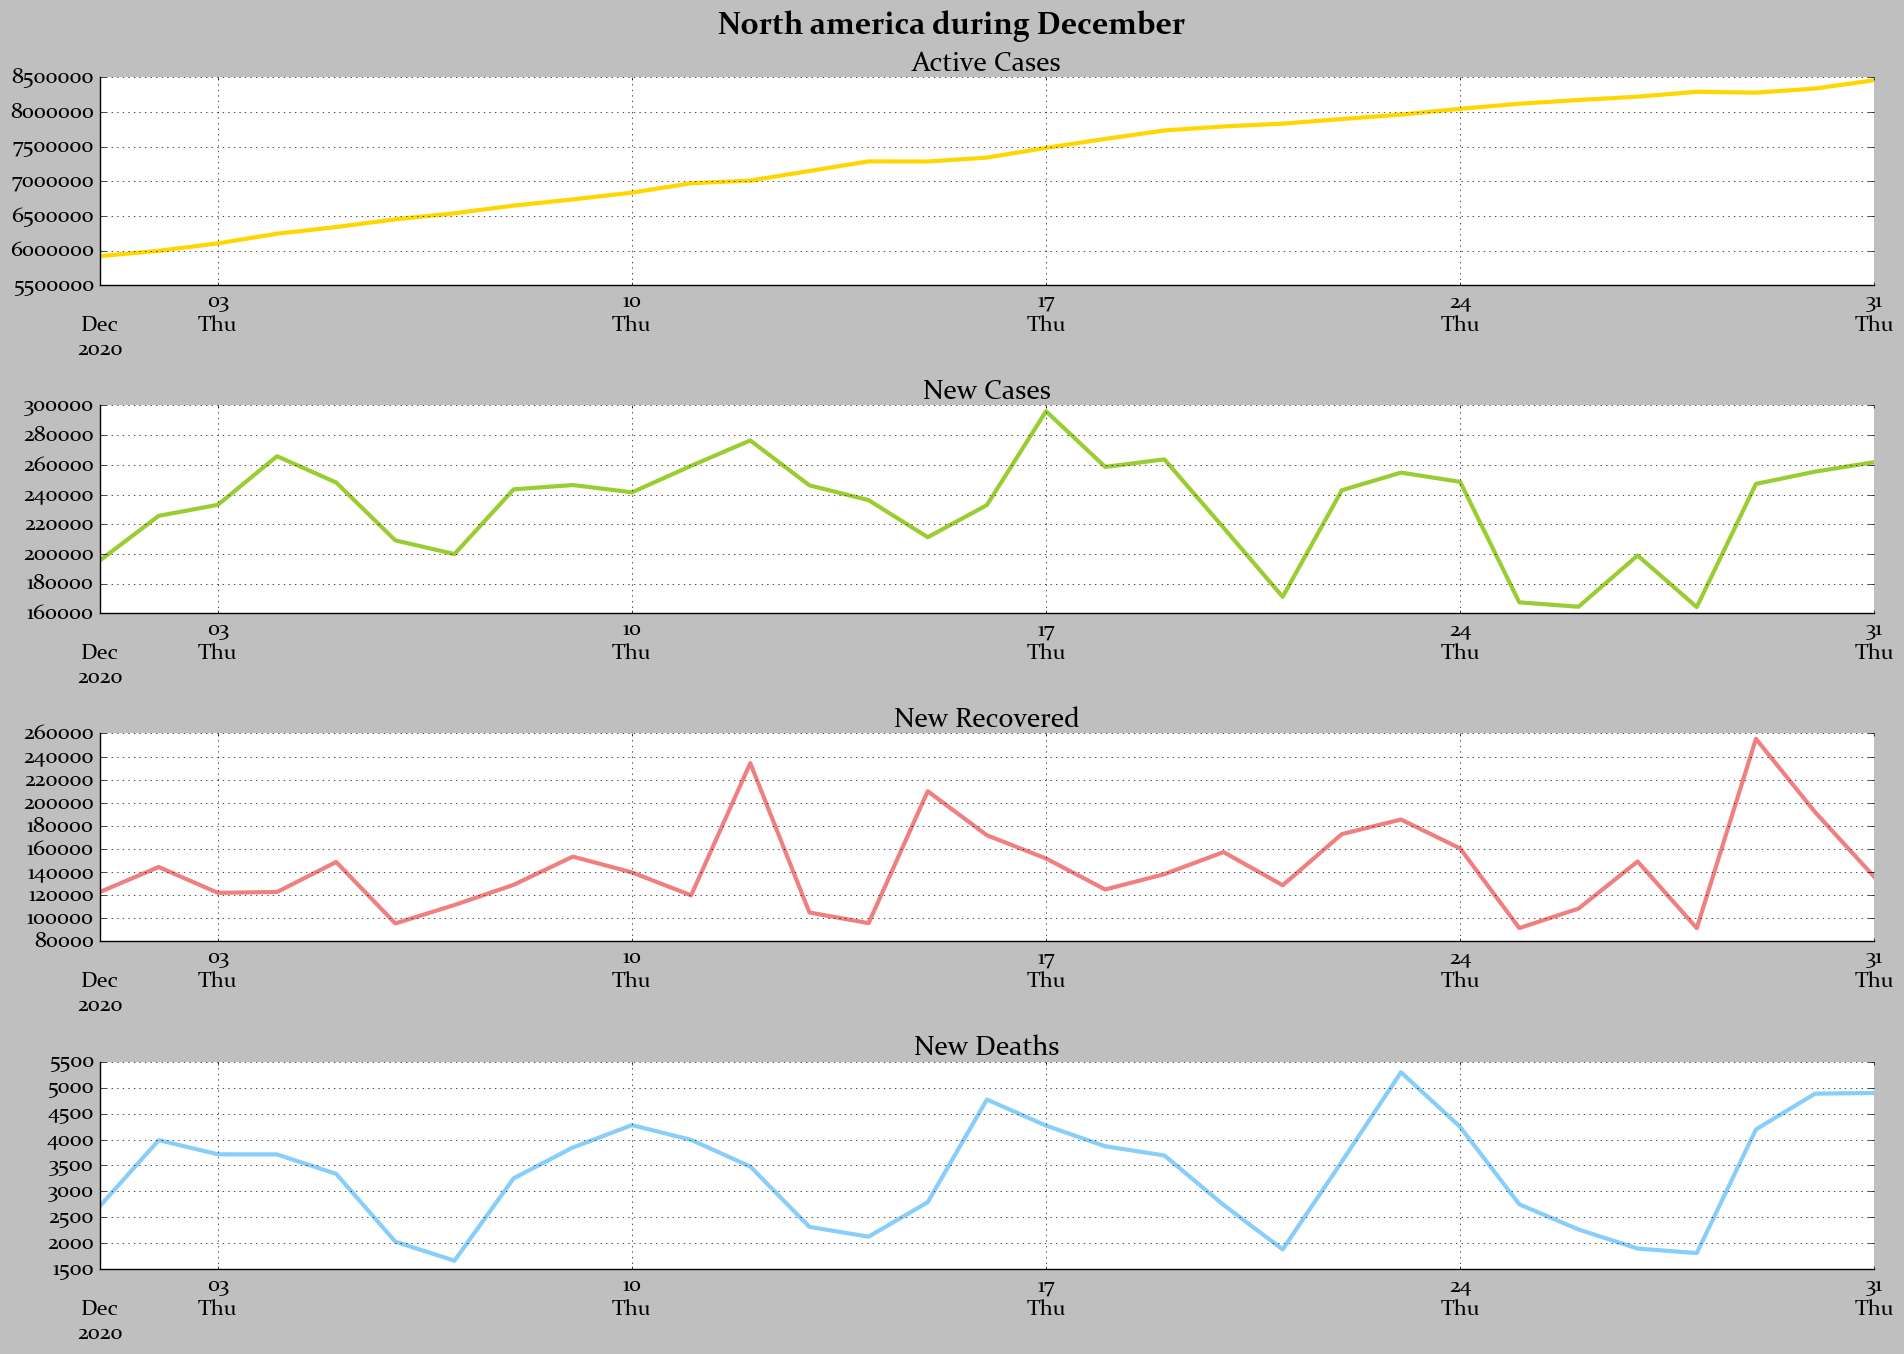

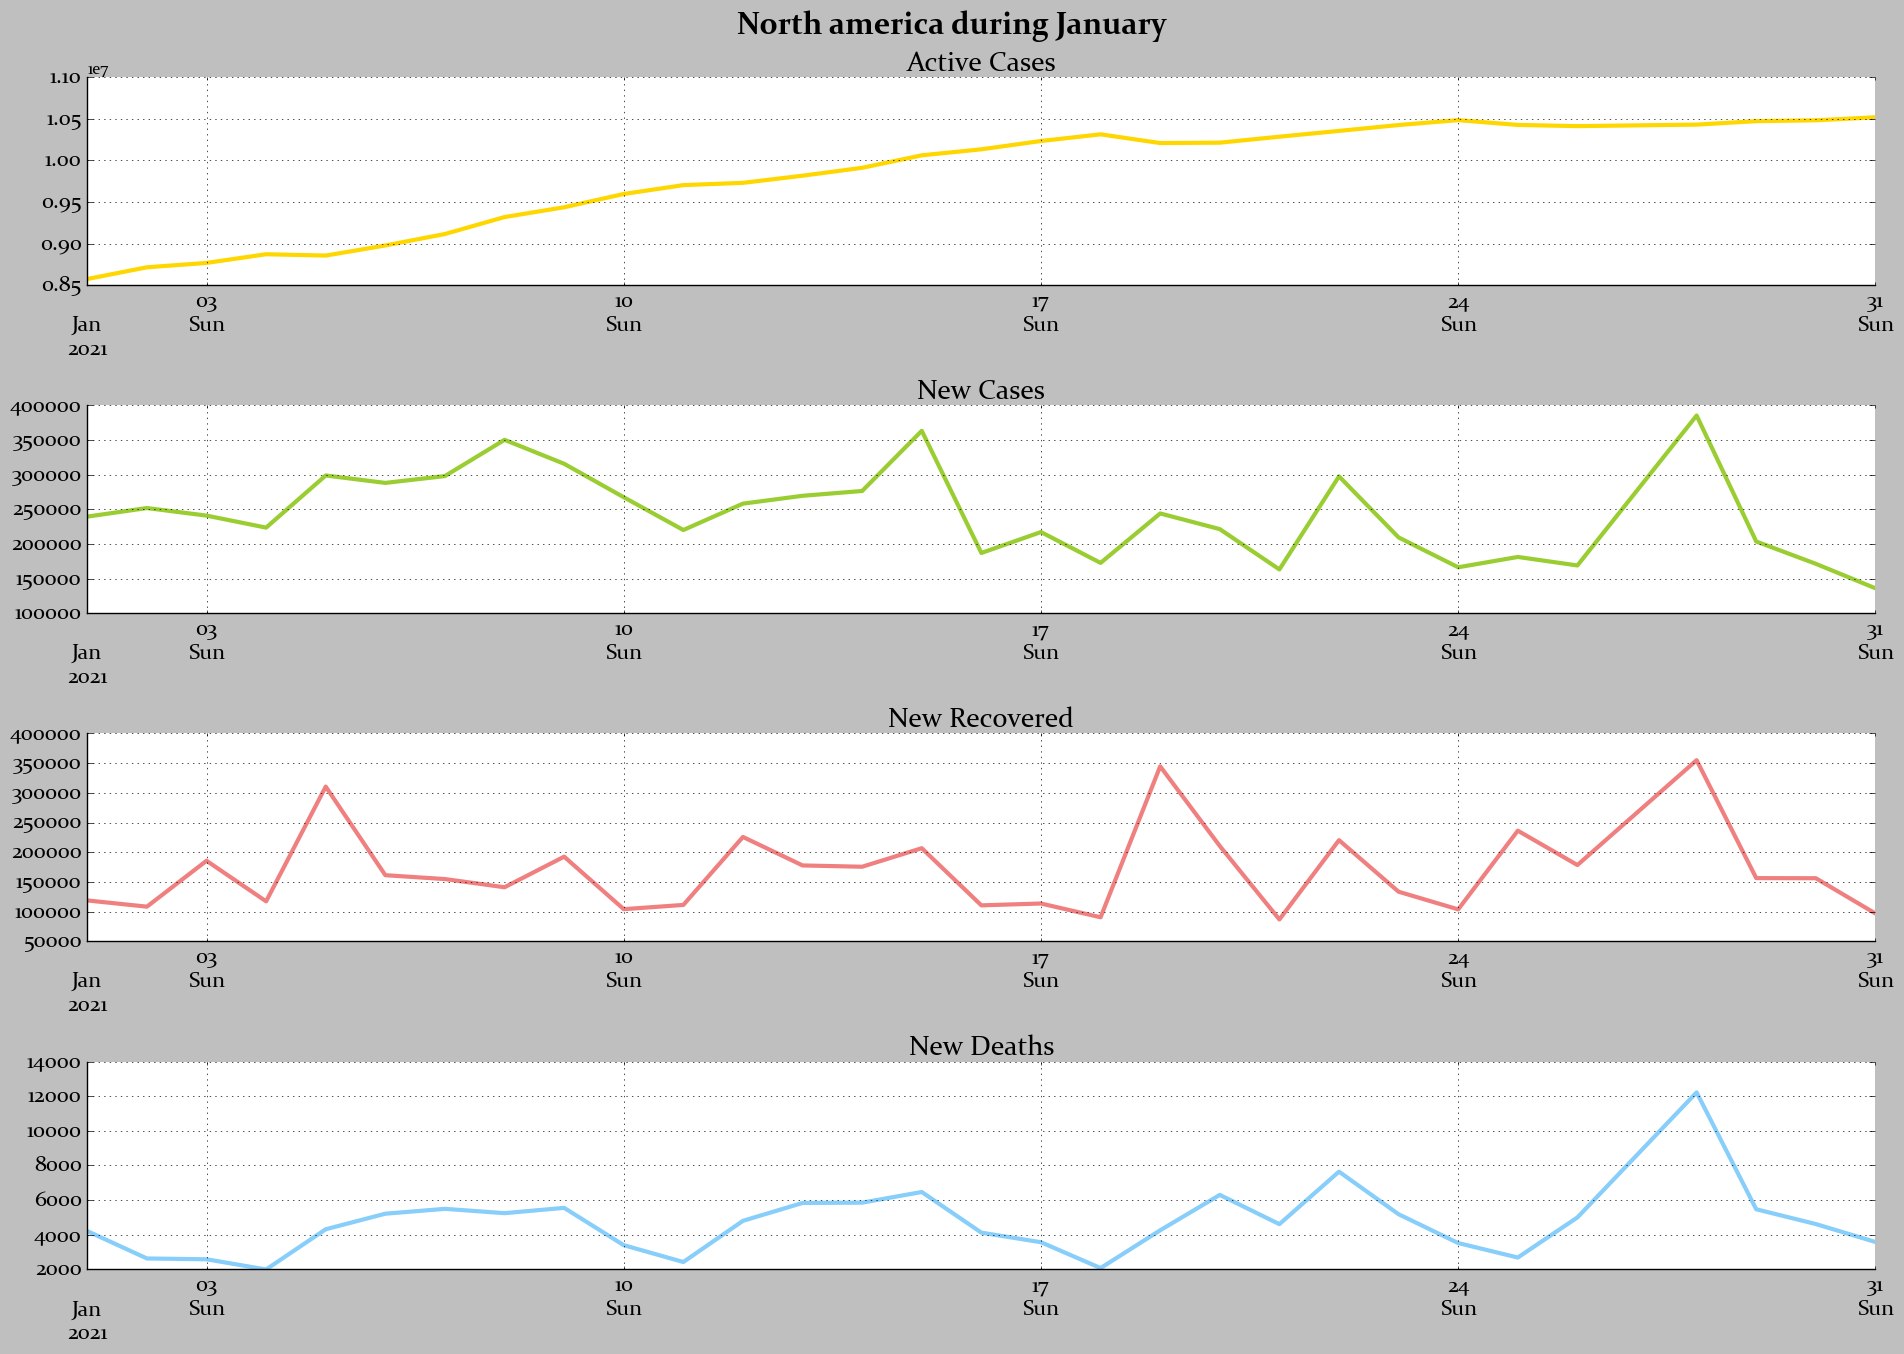

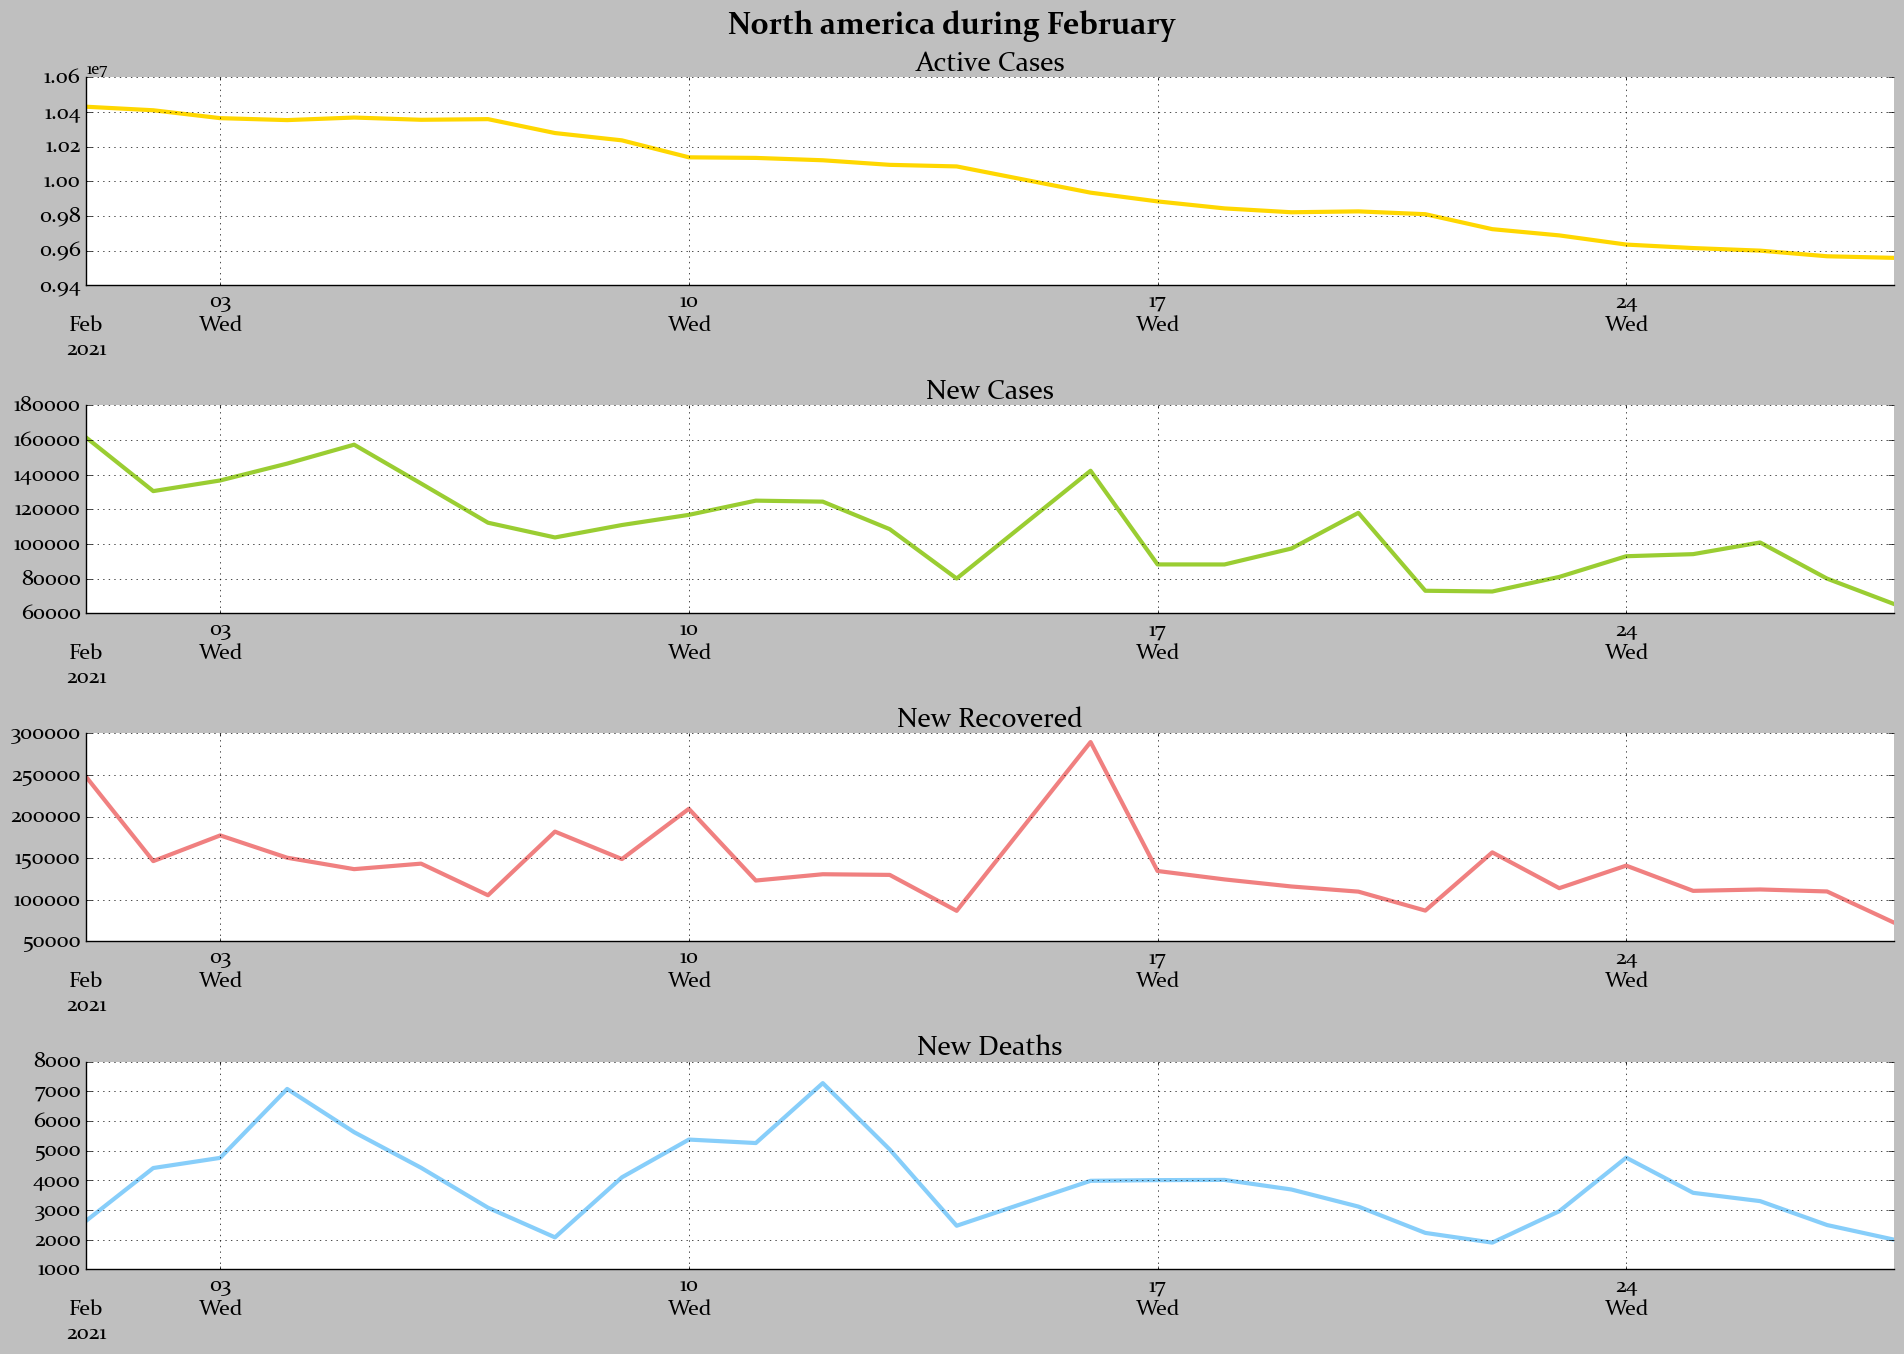

In [10]:
for month,year in zip(months_info['Month'].tolist(), months_info['Year'].tolist()):
    month_num = datetime.strptime(month[:3], "%b").month
    continent.monthly_plot(['ActiveCases', 'NewCases', 'NewRecovered', 'NewDeaths'], month_num, year,save = True)

#### Daily increases in deaths, recoveries, active cases,new cases.

In [11]:
continent.daily_increase3(save = True)


#### Closed cases ratio
$$TotalRecovered + TotalDeaths = TotalCases - ActiveCases$$

Answer:
    TotalRecovered TotalDeaths
207        97.034%      2.966%
Total time taken in closed_cases_pie function is: 0.003266666666666667 minutes.


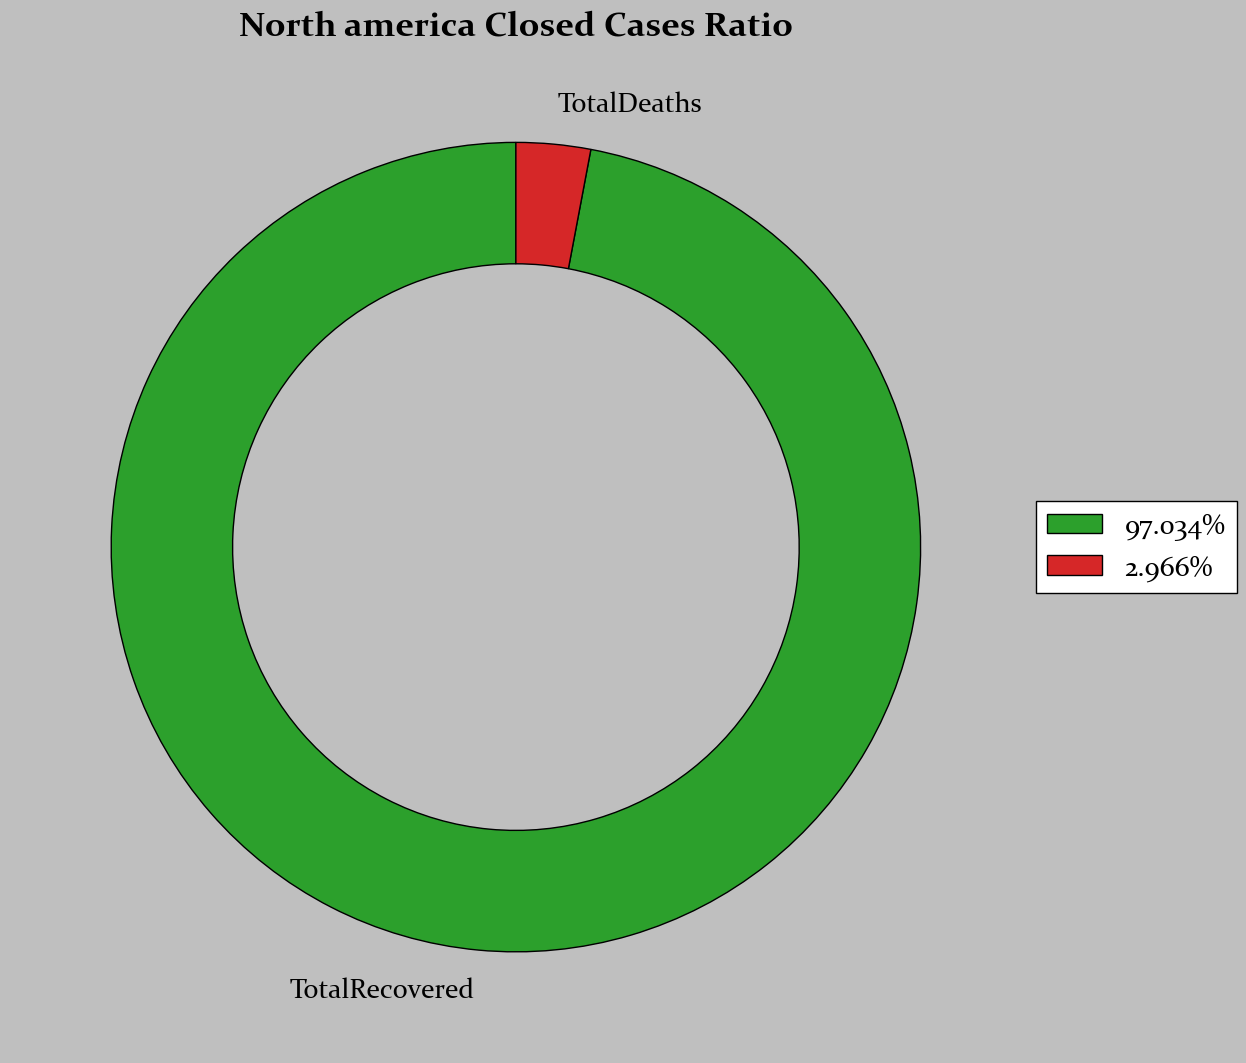

In [12]:
updated_totals = df[df['Date'].dt.date == continent.last_update]\
    [['TotalCases', 'ActiveCases', 'TotalRecovered', 'TotalDeaths']]
res = (updated_totals[['TotalRecovered', 'TotalDeaths']] / (updated_totals['TotalCases']\
                                             .values[0] - updated_totals['ActiveCases'].values[0])) * 100
res = round(res, 3).astype(str) + '%'
print('Answer:')
print(res)
continent.closed_cases_pie(save = True)

#### Measures Boxplot

In [13]:
continent.boxplot(['ActiveCases'], save=True)

In [14]:
measures = ['NewCases','NewRecovered']
continent.boxplot(measures, save=True)

In [15]:
continent.boxplot(['NewDeaths'], save=True)

### Part Three - Basic Analysis

In [16]:
print("Q1.Find the date of the day with the highest New Cases.")
res_date = df[df['NewCases'] == df['NewCases'].max()]['Date'].dt.date
print('Answer:')
pd.DataFrame(res_date)

Q1.Find the date of the day with the highest New Cases.
Answer:


Date
1  2020-08-08

In [17]:
print("Q2.Find the countries Case Fatality Ratio")
print('Answer: CFR= TotalDeaths/(TotalDeaths + TotalRecovered)')
continent.case_fatality_ratio().astype('str') + '%'



Q2.Find the countries Case Fatality Ratio
Answer: CFR= TotalDeaths/(TotalDeaths + TotalRecovered)


'3.743%'